## Categorical Plot

## seaborn.violinplot
seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
Draw a combination of boxplot and kernel density estimate.

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

bw{‘scott’, ‘silverman’, float}, optional
Either the name of a reference rule or the scale factor to use when computing the kernel bandwidth. The actual kernel size will be determined by multiplying the scale factor by the standard deviation of the data within each bin.

cutfloat, optional
Distance, in units of bandwidth size, to extend the density past the extreme datapoints. Set to 0 to limit the violin range within the range of the observed data (i.e., to have the same effect as trim=True in ggplot.

scale{“area”, “count”, “width”}, optional
The method used to scale the width of each violin. If area, each violin will have the same area. If count, the width of the violins will be scaled by the number of observations in that bin. If width, each violin will have the same width.

scale_huebool, optional
When nesting violins using a hue variable, this parameter determines whether the scaling is computed within each level of the major grouping variable (scale_hue=True) or across all the violins on the plot (scale_hue=False).

gridsizeint, optional
Number of points in the discrete grid used to compute the kernel density estimate.

widthfloat, optional
Width of a full element when not using hue nesting, or width of all the elements for one level of the major grouping variable.

inner{“box”, “quartile”, “point”, “stick”, None}, optional
Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

splitbool, optional
When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

dodgebool, optional
When hue nesting is used, whether elements should be shifted along the categorical axis.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

linewidthfloat, optional
Width of the gray lines that frame the plot elements.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

saturationfloat, optional
Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a single horizontal violinplot:

In [3]:
import matplotlib.pyplot as plt; 
import seaborn as sns; 
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


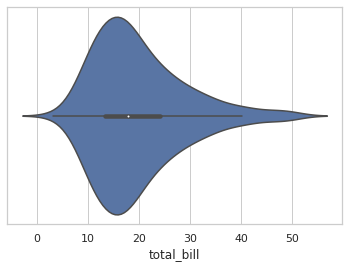

In [5]:
sns.violinplot(x= tips['total_bill'])
plt.show()

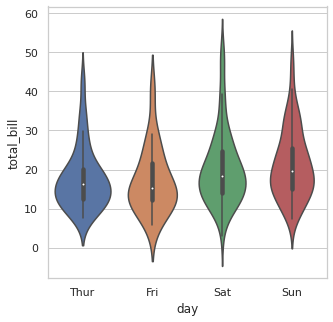

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.violinplot(x='day', y='total_bill', data=tips)
plt.show()

Draw a violinplot with nested grouping by two categorical variables:



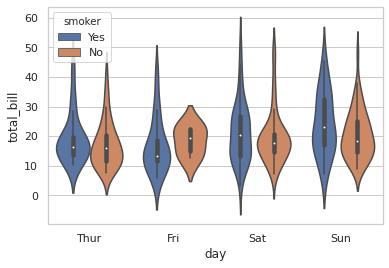

In [7]:
ax = sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips)
plt.show()

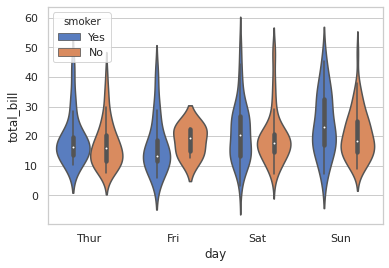

In [9]:
ax = sns.violinplot(x='day', y='total_bill', hue='smoker',palette='muted', data=tips)
plt.show()

Draw split violins to compare the across the hue variable:

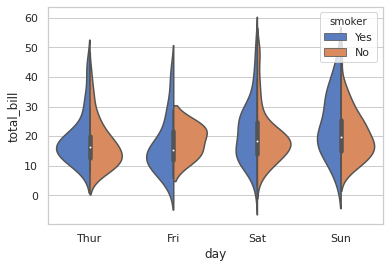

In [11]:
ax = sns.violinplot(x='day', y='total_bill', hue='smoker'
                   ,palette='muted', data=tips,split=True)
plt.show()

Control violin order by passing an explicit order:



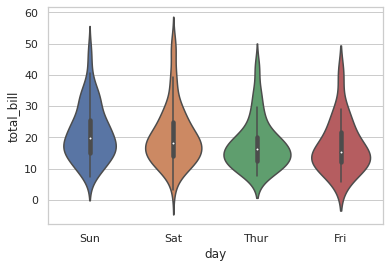

In [12]:
ax = sns.violinplot(x='day', y='total_bill',data=tips, order=['Sun', 'Sat', 'Thur', 'Fri'])
plt.show()


Scale the violin width by the number of observations in each bin:

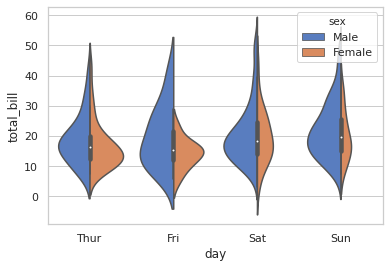

In [15]:
ax = sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True, palette='muted',
                   scale='count')

Draw the quartiles as horizontal lines instead of a mini-box:



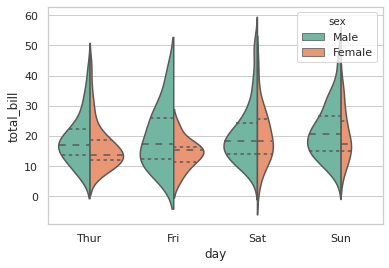

In [19]:
ax = sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', palette='Set2',
                   split=True, scale='count', inner='quartile')

Show each observation with a stick inside the violin:

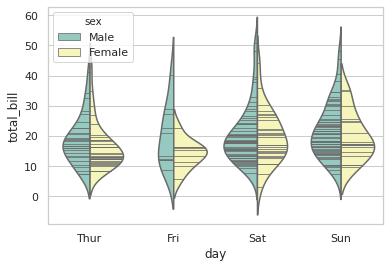

In [20]:
sns.violinplot(x='day', y='total_bill', hue='sex', palette='Set3', split=True,
              data=tips, inner='stick')

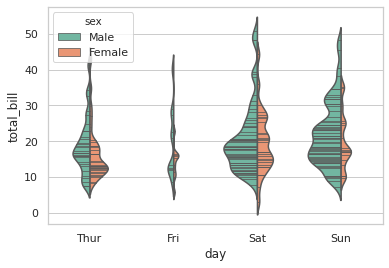

In [21]:

#Use a narrow bandwidth to reduce the amount of smoothing:

ax = sns.violinplot(x="day", y="total_bill", hue="sex",
                    data=tips, palette="Set2", split=True,
                    scale="count", inner="stick",
                    scale_hue=False, bw=.2)

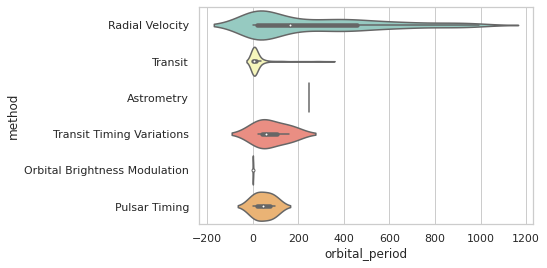

In [23]:
#Draw horizontal violins:

planets = sns.load_dataset("planets")
ax = sns.violinplot(x="orbital_period", y="method",
                    data=planets[planets.orbital_period < 1000],
                    scale="width", palette="Set3")

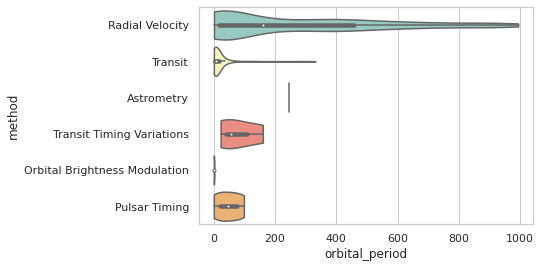

In [24]:
#Don’t let density extend past extreme values in the data:

ax = sns.violinplot(x="orbital_period", y="method",
                    data=planets[planets.orbital_period < 1000],
                    cut=0, scale="width", palette="Set3")


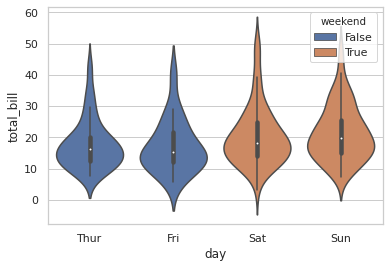

In [27]:
#Use hue without changing violin position or width:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
ax = sns.violinplot(x="day", y="total_bill", hue="weekend",
                    data=tips, dodge=False)

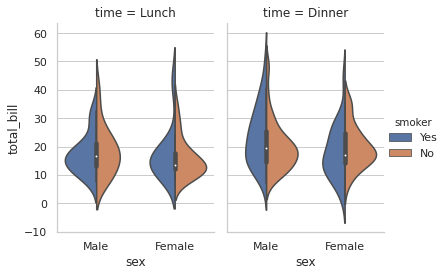

In [28]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="violin", split=True,
                height=4, aspect=.7);